In [319]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,f1_score,precision_score,recall_score,confusion_matrix

In [320]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [321]:
df.shape

(891, 12)

In [322]:
df.Age = df.Age.fillna(df.Age.mean())
df.Embarked = df.Embarked.fillna(df.Embarked.mode()[0])
df = df.drop(['Cabin'],axis = 1)

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [324]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\ACER\AppData\Local\Temp\ipykernel_4004\2966213890.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],kde = True , bins = 25)


<Axes: xlabel='Age', ylabel='Density'>

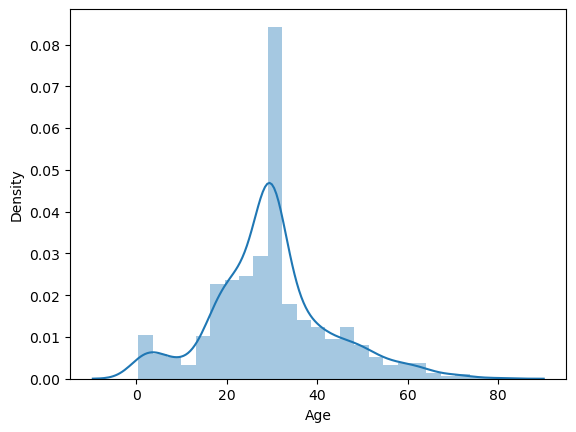

In [325]:
sns.distplot(df['Age'],kde = True , bins = 25)


In [326]:
print(df.Age.skew(),
df.Age.kurt())

0.4344880940129925 0.9662793026645233


<Axes: xlabel='Age'>

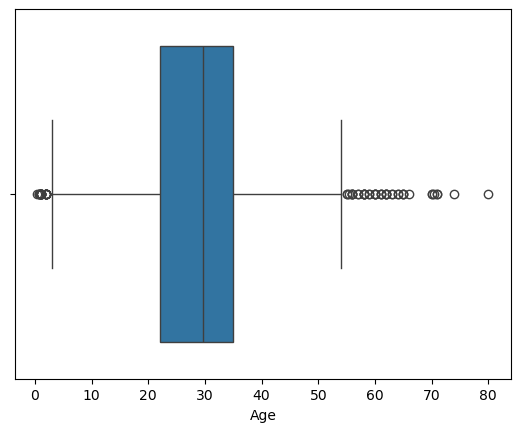

In [327]:
sns.boxplot(x = df['Age'])

In [328]:
df[(df['Age']>=75)].value_counts().shape[0]

1

C:\Users\ACER\AppData\Local\Temp\ipykernel_4004\4238333344.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']== 0].Age,kde = True , bins = 25)
C:\Users\ACER\AppData\Local\Temp\ipykernel_4004\4238333344.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']== 1].

<Axes: xlabel='Age', ylabel='Density'>

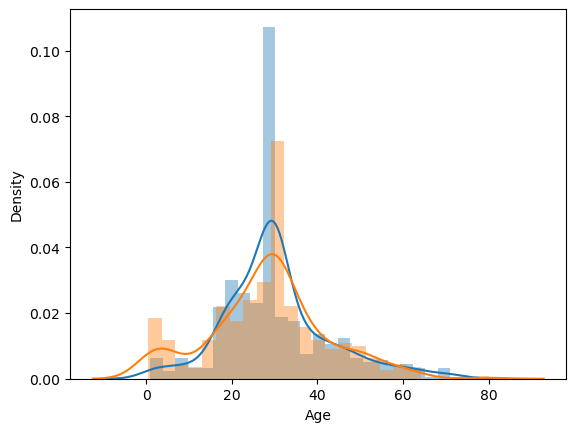

In [329]:
sns.distplot(df[df['Survived']== 0].Age,kde = True , bins = 25)
sns.distplot(df[df['Survived']== 1].Age,kde = True , bins = 25)

*Conclusion

1.The value of skew and kurt shows a stable age distribution

2.The values of young people died more than children and adults

3.The outliers may be small


In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Eda on Fare

C:\Users\ACER\AppData\Local\Temp\ipykernel_4004\3269648805.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'],kde = True ,bins = 25)


<Axes: xlabel='Fare', ylabel='Density'>

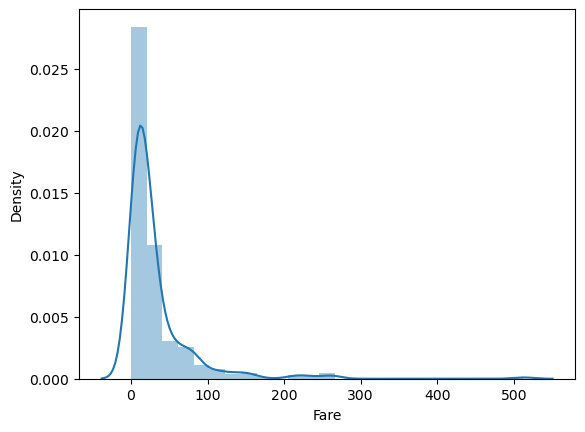

In [331]:
sns.distplot(df['Fare'],kde = True ,bins = 25)

<Axes: xlabel='Fare'>

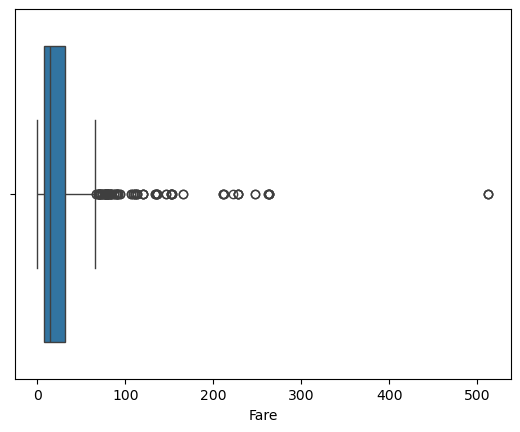

In [332]:
sns.boxplot(x = df['Fare'])

In [333]:
df[df["Fare"] > 500].value_counts().shape[0]


3

In [334]:
print(df.Fare.skew(),
df.Fare.kurt())

4.787316519674893 33.39814088089868


C:\Users\ACER\AppData\Local\Temp\ipykernel_4004\2487053228.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']== 0].Fare)
C:\Users\ACER\AppData\Local\Temp\ipykernel_4004\2487053228.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']== 1].Fare)


<Axes: xlabel='Fare', ylabel='Density'>

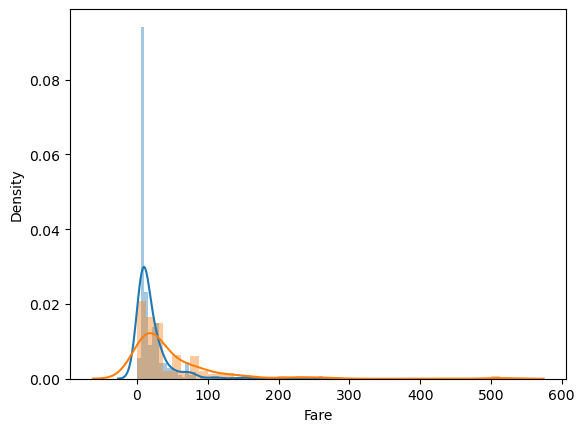

In [335]:
sns.distplot(df[df['Survived']== 0].Fare)
sns.distplot(df[df['Survived']== 1].Fare)

Conclusion:

1.Distribution is rightskewd and peaked a lot(not normal distribution)

2.Outliers are available

3.Death in higher valued bunks are lesser

#Categorical Features Exploration

Sex based survival

<Axes: xlabel='Sex', ylabel='count'>

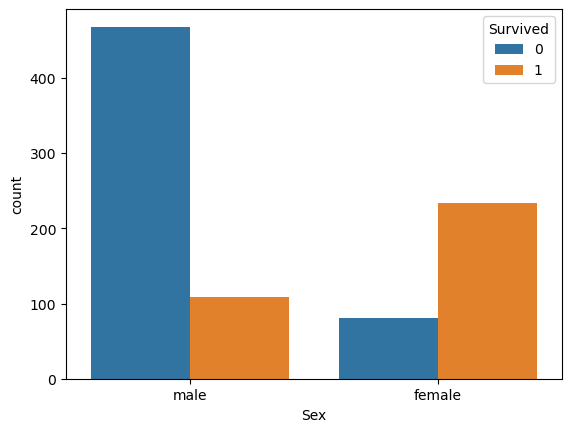

In [336]:
sns.countplot(x = 'Sex', data = df ,hue = 'Survived' )

In [337]:
pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis = 1)

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


Conclusin:

1.More Women survived in titanic

#Survival With Embarked

<Axes: xlabel='Embarked', ylabel='count'>

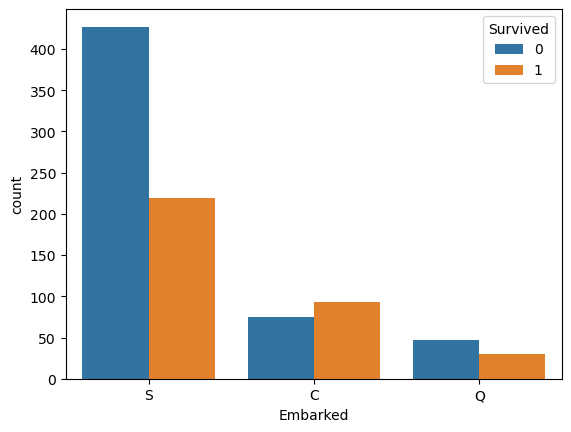

In [338]:
sns.countplot(x ='Embarked',data = df ,hue = 'Survived' )

In [339]:
pd.crosstab(df['Embarked'],df['Survived']).apply(lambda r : round(r/r.sum()*100,1),axis = 1)

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


Conclusion:

1.The city C got more people saved

In [340]:
df.info(
)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [341]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [342]:
df['Family'] = df['Parch']+df['SibSp']

In [343]:
def fmsz(family):
    if(family == 0):
        return 'Alone'
    elif(family >= 1 and family <=5):
        return 'Medium'
    else:
        return 'Large'

df['Family_Size'] = df['Family'].apply(fmsz)

In [344]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Family', 'Family_Size'],
      dtype='object')

In [345]:
df.Family_Size.unique()

array(['Medium', 'Alone', 'Large'], dtype=object)

#survival with family size

Survived,0,1
Family_Size,,
Alone,69.6,30.4
Large,84.0,16.0
Medium,46.8,53.2


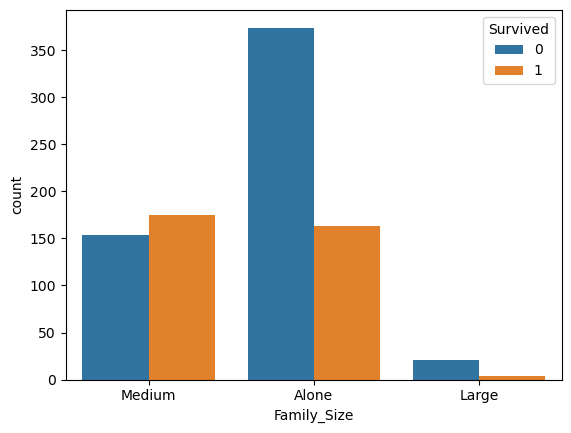

In [346]:
#effects of family size
sns.countplot(x = 'Family_Size' , data = df , hue = 'Survived')
pd.crosstab(df['Family_Size'],df['Survived']).apply(lambda r : round(r/r.sum()*100,1),axis = 1)



Coclusion:

1. Large family is dying more
2. Medium family is dying least

In [347]:
df['Title'] = df['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()


In [348]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

#survival based on title

In [349]:
def sdfy(title):
    if title in ['Mr', 'Mrs', 'Rev', 'Don', 'Jonkheer', 'Mlle', 'Mme', 'Ms', 'Miss']:
        return 'Commoner'
    elif title in ['Master', 'Lady', 'Sir', 'Countess']:
        return 'Royalty'
    else:
        return 'Officer'

# Apply the function
df['Title_Group'] = df['Title'].apply(sdfy)




In [350]:
df = df.astype(
    {
        'Sex':'category',
        'Embarked':'category',
        'Pclass':'category',
        'Age' : 'int',
        'Fare' : 'int',
        'Family_Size' : 'category',
        'Title' : 'category',
        'Title_Group':'category',
       



    }
)

Survived,0,1
Title_Group,,
Commoner,62.8,37.2
Officer,53.8,46.2
Royalty,40.5,59.5


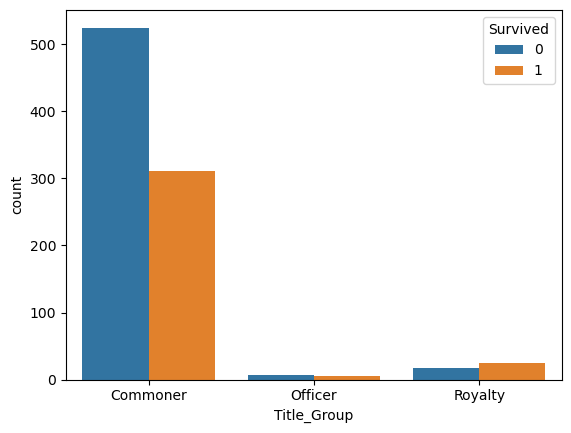

In [351]:

sns.countplot(x = 'Title_Group' , data = df , hue = 'Survived')
pd.crosstab(df['Title_Group'],df['Survived']).apply(lambda r : round(r/r.sum()*100,1),axis =1)



#survival with pclass considering its population

Family_Size,Alone,Large,Medium
Pclass,,,
1,50.5,0.0,49.5
2,56.5,0.0,43.5
3,66.0,5.1,28.9


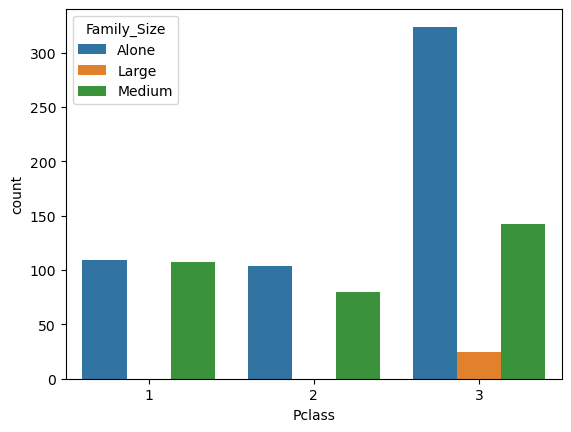

In [352]:
sns.countplot(x = 'Pclass',data = df , hue = 'Family_Size')
pd.crosstab(df['Pclass'],df['Family_Size']).apply(lambda r : round(r/r.sum()*100,1),axis = 1)

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


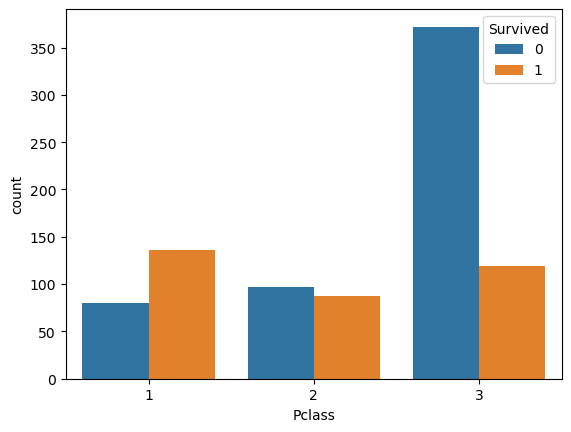

In [353]:
sns.countplot(x = 'Pclass' , data = df , hue = 'Survived')
pd.crosstab(df['Pclass'],df['Survived']).apply(lambda r : round(r/r.sum()*100,1),axis = 1)

Conclusion:

1.Its evident from the above Eda that large family had their seats in pclass3

2.The chance of death in 3 class were more evident

3.The chance of survival in class were more

In [354]:
def group(Age):
    if(Age < 20):
        return 'Child'
    elif(Age >= 20 and Age <= 40):
        return 'Young'
    else:
        return 'Old'

df['Age_Group'] = df['Age'].apply(group)
df = df.astype({
    'Age_Group':'category'
})


Handling Outliers


In [355]:
##df.shape

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    int64   
 10  Embarked     891 non-null    category
 11  Family       891 non-null    int64   
 12  Family_Size  891 non-null    category
 13  Title        891 non-null    category
 14  Title_Group  891 non-null    category
 15  Age_Group    891 non-null    category
dtypes: category(7), int64(7), object(2)
memory usage: 70.3+ KB


In [357]:
df.dtypes

PassengerId       int64
Survived          int64
Pclass         category
Name             object
Sex            category
Age               int64
SibSp             int64
Parch             int64
Ticket           object
Fare              int64
Embarked       category
Family            int64
Family_Size    category
Title          category
Title_Group    category
Age_Group      category
dtype: object

In [358]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Family', 'Family_Size', 'Title',
       'Title_Group', 'Age_Group'],
      dtype='object')

In [359]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Pclass','Family_Size','Title_Group','Age_Group'], drop_first=False,dtype = int)

In [360]:
X = df.drop(['PassengerId','Survived','Name','Age','SibSp','Parch','Family','Fare','Ticket','Title'],axis = 1)

In [361]:
X.columns

Index(['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Family_Size_Alone',
       'Family_Size_Large', 'Family_Size_Medium', 'Title_Group_Commoner',
       'Title_Group_Officer', 'Title_Group_Royalty', 'Age_Group_Child',
       'Age_Group_Old', 'Age_Group_Young'],
      dtype='object')

In [362]:
Y = df['Survived']

In [363]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2 ,random_state = 45)

In [364]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(class_weight="balanced", random_state=42)

param_grid = {
    'n_estimators': [200, 500, 800,1000],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10,4],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2',3,.5]
}

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, Y_train)
print("Best params:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best params: {'max_depth': 5, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}
Best CV Score: 0.8519100603352809


In [385]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print(accuracy_score(Y_test,y_pred))
star = StratifiedKFold(n_splits=10)
cross_val_score(best_model,X,Y,cv = star)

0.8324022346368715


array([0.75555556, 0.79775281, 0.75280899, 0.79775281, 0.78651685,
       0.79775281, 0.82022472, 0.76404494, 0.85393258, 0.82022472])

In [386]:
df2 = pd.read_csv('titanictest.csv')

In [387]:
df2.shape

(418, 11)

In [388]:
df2.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [390]:
print(df2.Pclass.unique(),df2.Sex.unique(),df2.Embarked.unique())

[3 2 1] ['male' 'female'] ['Q' 'S' 'C']


In [391]:
df2.Age = df2.Age.fillna(df2.Age.mean())


df2['Family'] = df2['Parch']+df2['SibSp']
df2.Family.isnull().sum()
df2 = df2.drop(['SibSp','Parch','Fare','Cabin','Ticket'],axis = 1)

In [392]:
df2.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'Embarked', 'Family'], dtype='object')

In [393]:
def group(Age):
    if(Age < 20):
        return 'Child'
    elif(Age >= 20 and Age <= 40):
        return 'Young'
    else:
        return 'Old'

df2['Age_Group'] = df2['Age'].apply(group)
df2 = df2.astype({
    'Age_Group':'category'
})


In [394]:
df2['Title'] = df2['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()
df2['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [395]:
def sdfy(title):
    if title in ['Mr', 'Mrs', 'Rev', 'Don', 'Jonkheer', 'Mlle', 'Mme', 'Ms', 'Miss','Dona']:
        return 'Commoner'
    elif title in ['Master', 'Lady', 'Sir', 'Countess']:
        return 'Royalty'
    else:
        return 'Officer'

# Apply the function
df2['Title_Group'] = df2['Title'].apply(sdfy)


In [396]:
def fmsz(family):
    if(family == 0):
        return 'Alone'
    elif(family >= 1 and family <=5):
        return 'Medium'
    else:
        return 'Large'

df2['Family_Size'] = df2['Family'].apply(fmsz)

In [397]:
df2 = df2.astype(
    {
        'Sex':'category',
        'Embarked':'category',
        'Pclass':'category',
        'Age' : 'int',
        
        'Family_Size' : 'category',
        'Title' : 'category',
        'Title_Group':'category',
       



    }
)

In [398]:
df2.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'Embarked', 'Family',
       'Age_Group', 'Title', 'Title_Group', 'Family_Size'],
      dtype='object')

In [399]:
df2 = pd.get_dummies(df2, columns=['Sex', 'Embarked', 'Pclass','Family_Size','Title_Group','Age_Group'], drop_first=False,dtype = int)

In [400]:
Xo = df2.drop(['PassengerId','Name','Age','Family','Title'],axis = 1)

In [401]:
Xo.columns

Index(['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Family_Size_Alone',
       'Family_Size_Large', 'Family_Size_Medium', 'Title_Group_Commoner',
       'Title_Group_Officer', 'Title_Group_Royalty', 'Age_Group_Child',
       'Age_Group_Old', 'Age_Group_Young'],
      dtype='object')

In [402]:
Xo.shape

(418, 17)

In [404]:
best_model = grid.best_estimator_
y_pred2 = best_model.predict(Xo)

In [405]:
per = pd.DataFrame({'PassengerId' : df2['PassengerId'],'Survived': y_pred2})

In [406]:
per.to_csv('Final_sub.csv',index = False)